In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import h5py

from my_utils.utils_tdep import parse_outfile_forceconstants

from ase.io import read

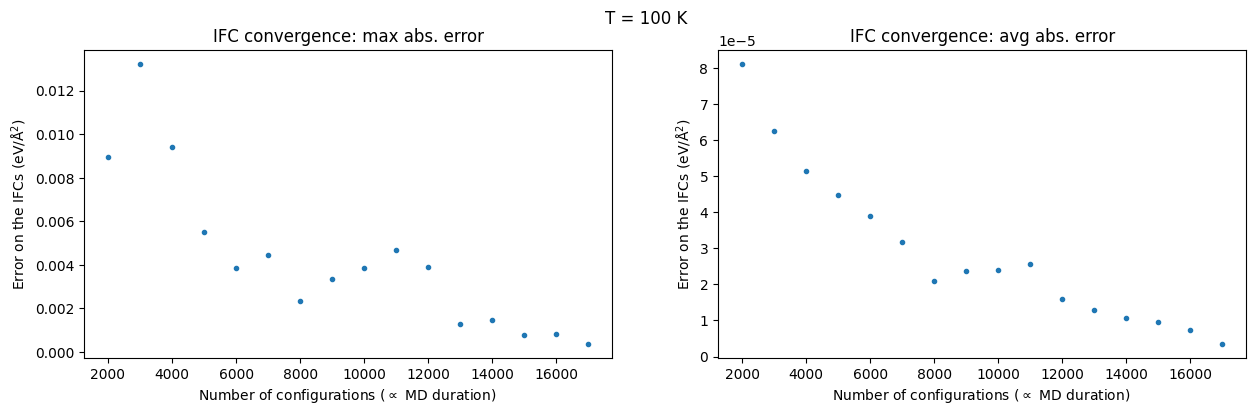

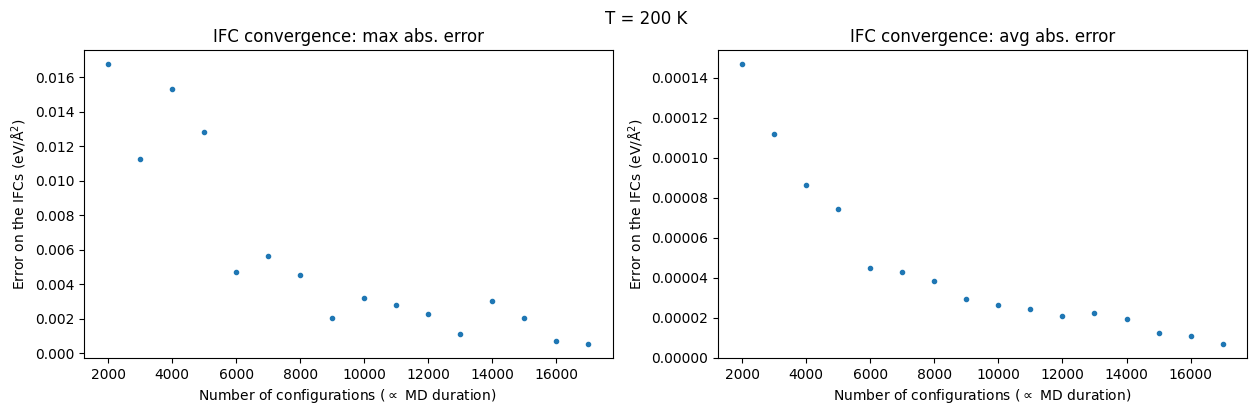

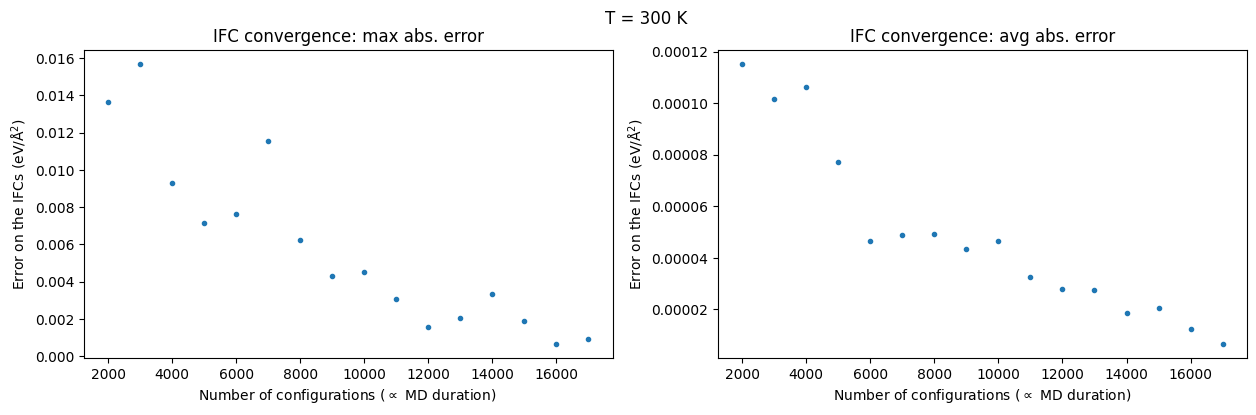

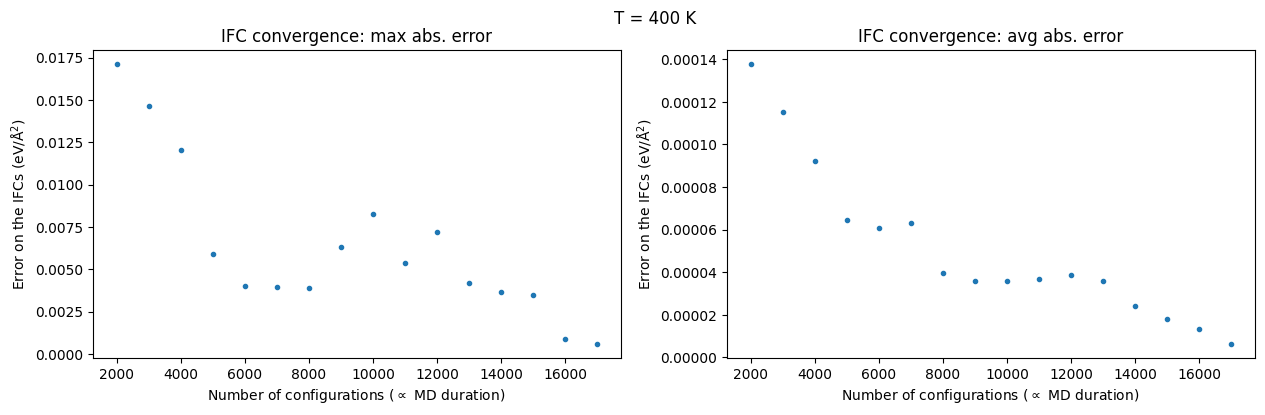

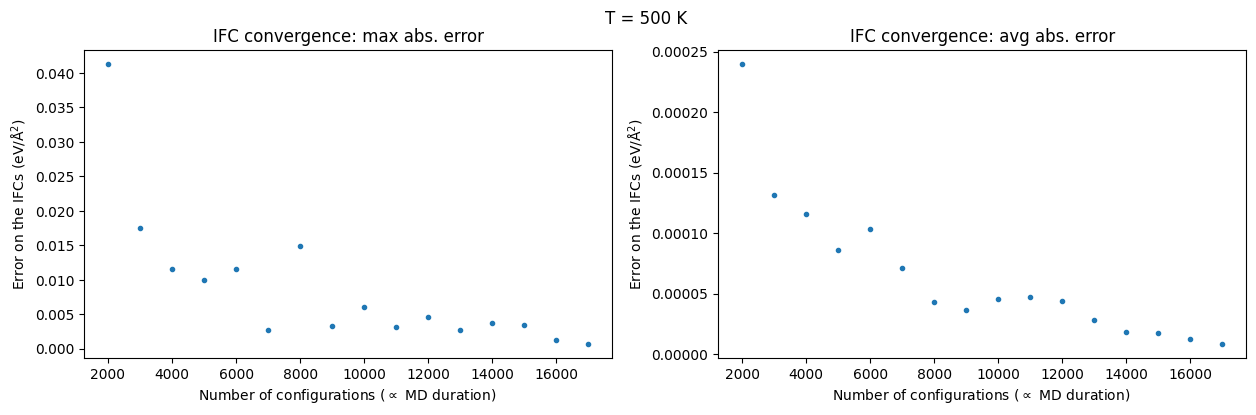

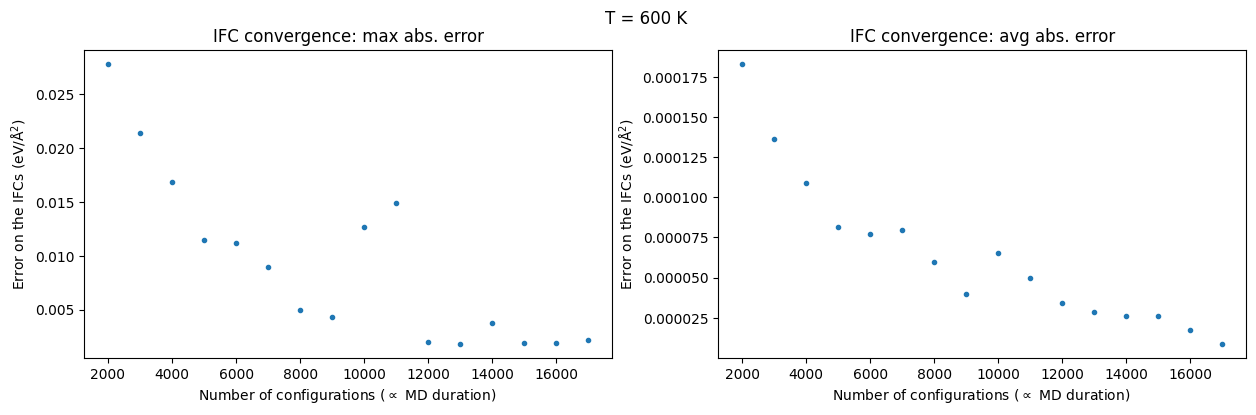

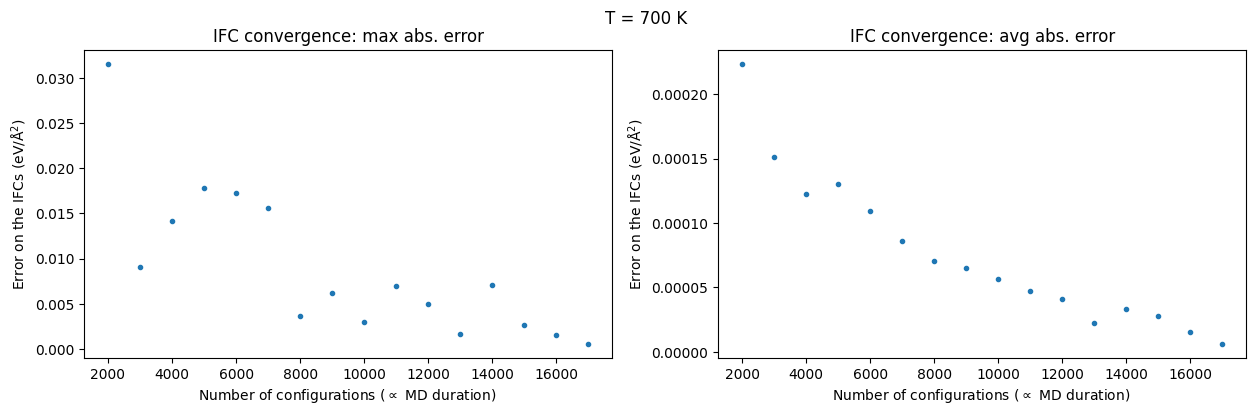

In [82]:
# SAMPLING SIZE


convfig_dir = Path('./Tdep_convergence_figures/sampling_size')
convfig_dir.mkdir(parents=True, exist_ok=True)

for T in range(100,800,100):
    conv_dir = Path(f'T{T}K/Convergence_tdep/sampling_size')
    dirs = [x for x in conv_dir.glob('*_size')]
    dirs = sorted(dirs, key=lambda x:int(str(x).split('/')[-1].split('_')[0]))
    
    ifcs = []
    xx = []
    for dir in dirs:
        ifc_file = dir.joinpath('outfile.forceconstant')
        xx.append(int(dir.name.split('_')[0]))
        unitcell = read(dir.joinpath('infile.ucposcar'), format='vasp')
        supercell = read(dir.joinpath('infile.ssposcar'), format='vasp')
        ifc = parse_outfile_forceconstants(ifc_file, unitcell, supercell)
        ifcs.append(ifc)
    ifcs = np.array(ifcs)
    
    diffs = np.array([abs(ifcs[i] - ifcs[i-1]) for i in range(1, ifcs.shape[0])])
    max_diffs = np.max(diffs,axis=(1,2,3,4))
    avg_diffs = np.mean(diffs, axis=(1,2,3,4))
    #std_dev_diffs = np.std(diffs, axis=(1,2,3,4))
    
    
    Fig = plt.figure(figsize=(15,4))
    plt.suptitle(f'T = {T} K')
    Fig.add_subplot(1,2,1)
    plt.plot(xx[1:], max_diffs, '.')
    plt.title('IFC convergence: max abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('Number of configurations ($\propto$ MD duration) ')
    
    Fig.add_subplot(1,2,2)
    plt.plot(xx[1:], avg_diffs, '.')
    plt.title('IFC convergence: avg abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('Number of configurations ($\propto$ MD duration) ')
    figpath = convfig_dir.joinpath(f'T{T}K.png')
    plt.savefig(fname=figpath, bbox_inches='tight', dpi=600, format='png')



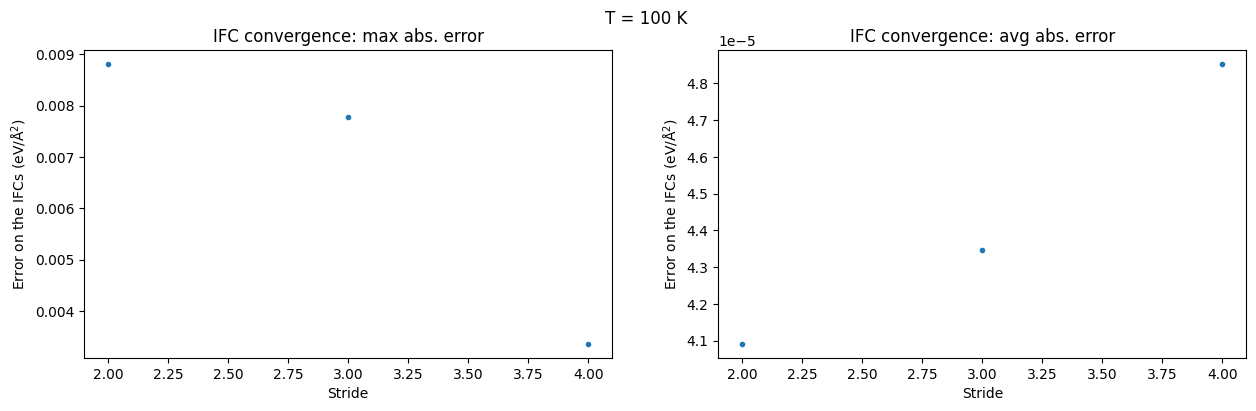

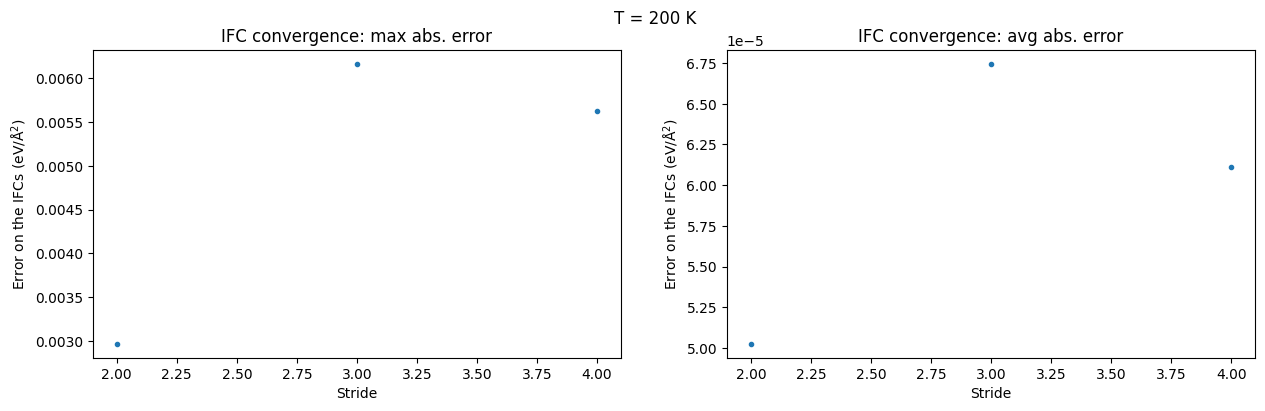

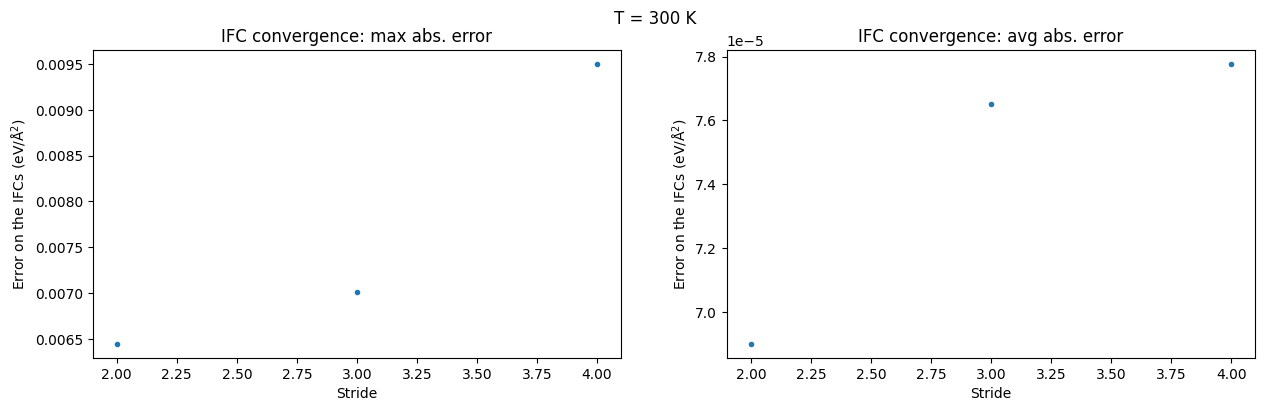

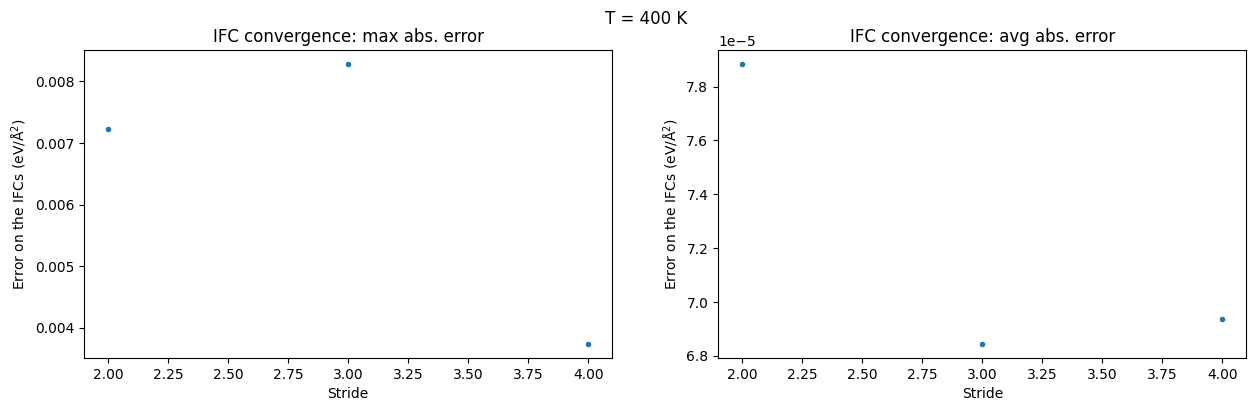

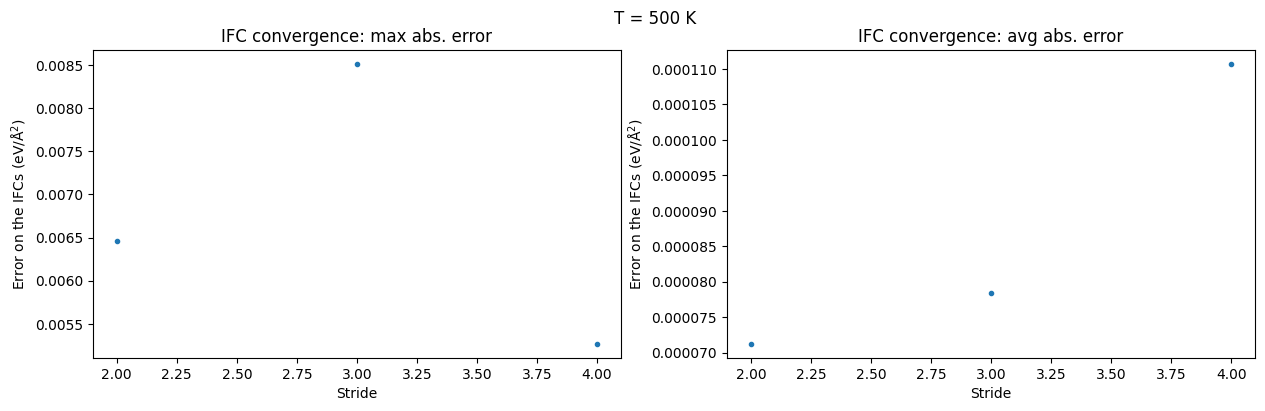

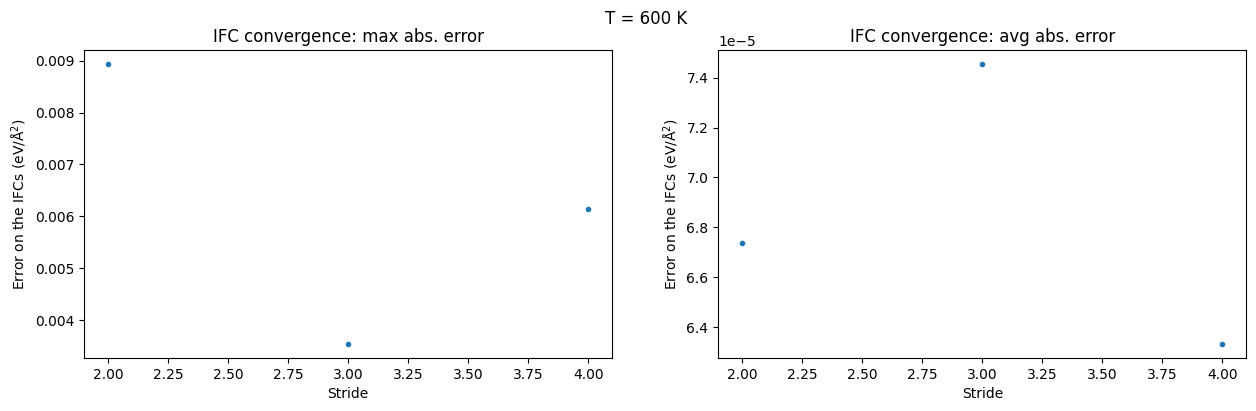

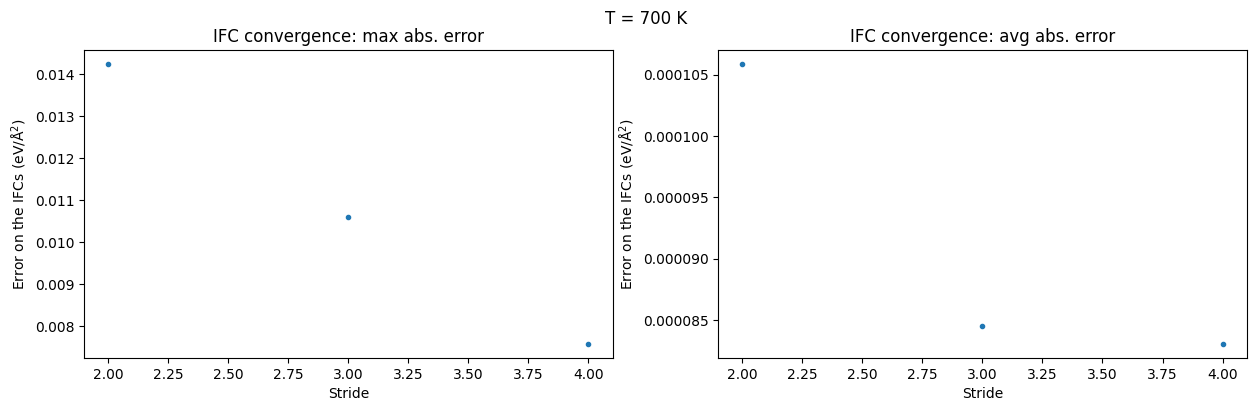

In [2]:
# STRIDE

convfig_dir = Path('./Tdep_convergence_figures/stride')
convfig_dir.mkdir(parents=True, exist_ok=True)

for T in range(100,800,100):
    conv_dir = Path(f'T{T}K/Convergence_tdep/strides')
    dirs = [x for x in conv_dir.glob('*_stride')]
    dirs = sorted(dirs, key=lambda x:int(str(x).split('/')[-1].split('_')[0]))
    
    ifcs = []
    xx = []
    
    for dir in dirs:
        ifc_file = dir.joinpath('outfile.forceconstant')
        xx.append(int(dir.name.split('_')[0]))
        unitcell = read(dir.joinpath('infile.ucposcar'), format='vasp')
        supercell = read(dir.joinpath('infile.ssposcar'), format='vasp')
        ifc = parse_outfile_forceconstants(ifc_file, unitcell, supercell)
        ifcs.append(ifc)
    ifcs = np.array(ifcs)
    
    diffs = np.array([abs(ifcs[i] - ifcs[i-1]) for i in range(1, ifcs.shape[0])])
    max_diffs = np.max(diffs,axis=(1,2,3,4))
    avg_diffs = np.mean(diffs, axis=(1,2,3,4))
    #std_dev_diffs = np.std(diffs, axis=(1,2,3,4))
    
    
    Fig = plt.figure(figsize=(15,4))
    plt.suptitle(f'T = {T} K')
    Fig.add_subplot(1,2,1)
    plt.plot(xx[1:], max_diffs, '.')
    plt.title('IFC convergence: max abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('Stride')
    
    Fig.add_subplot(1,2,2)
    plt.plot(xx[1:], avg_diffs, '.')
    plt.title('IFC convergence: avg abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('Stride')
    figpath = convfig_dir.joinpath(f'T{T}K.png')
    plt.savefig(fname=figpath, bbox_inches='tight', dpi=600, format='png')




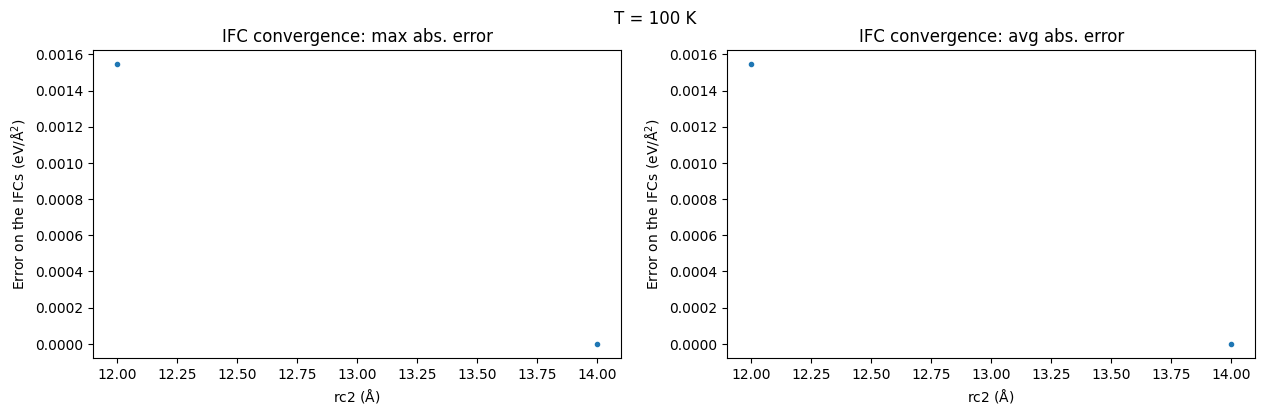

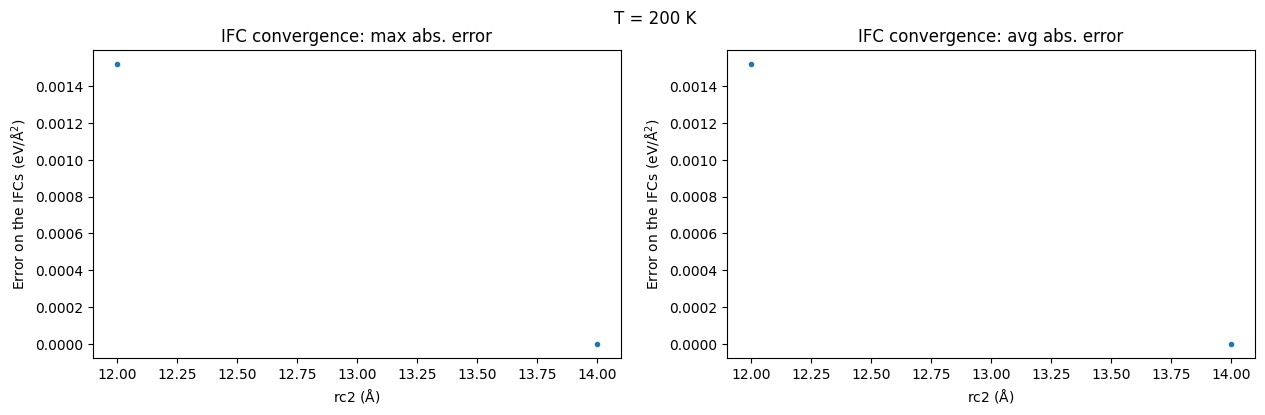

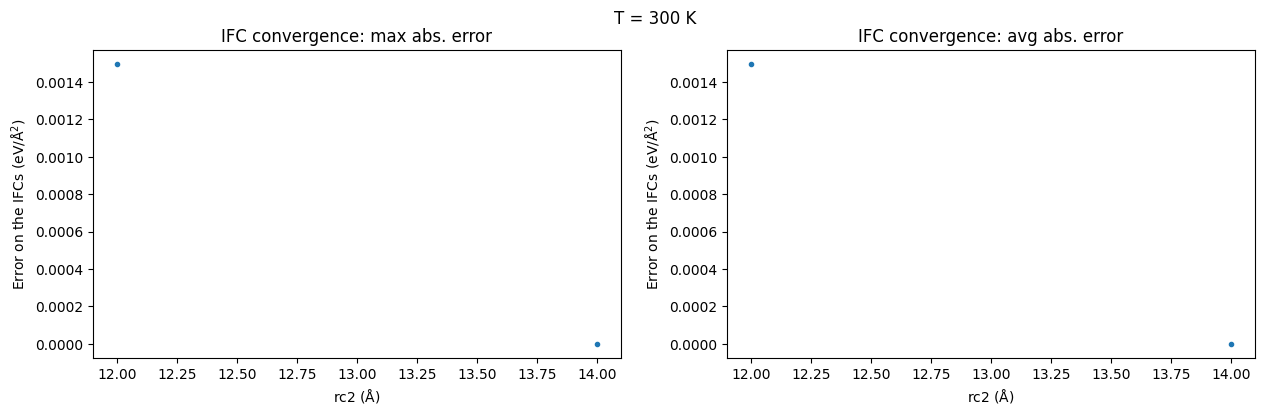

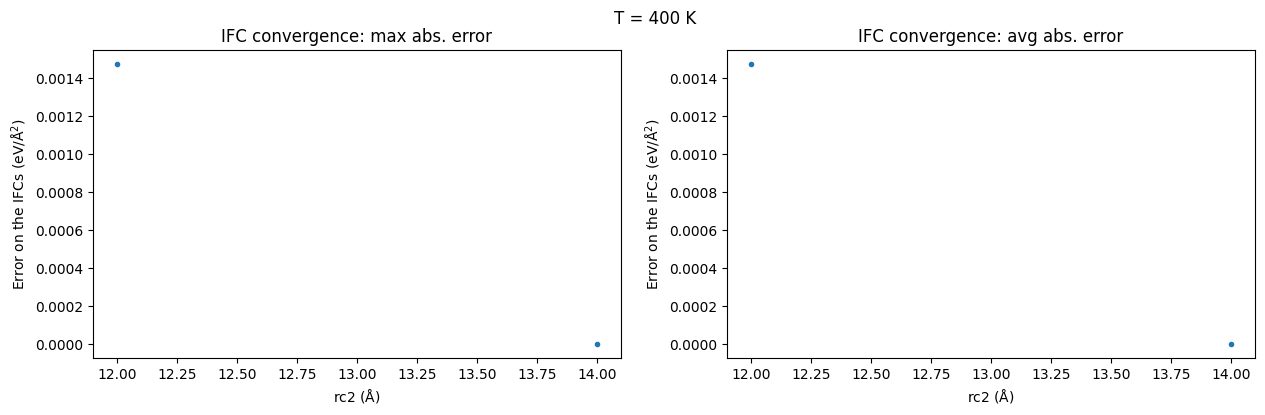

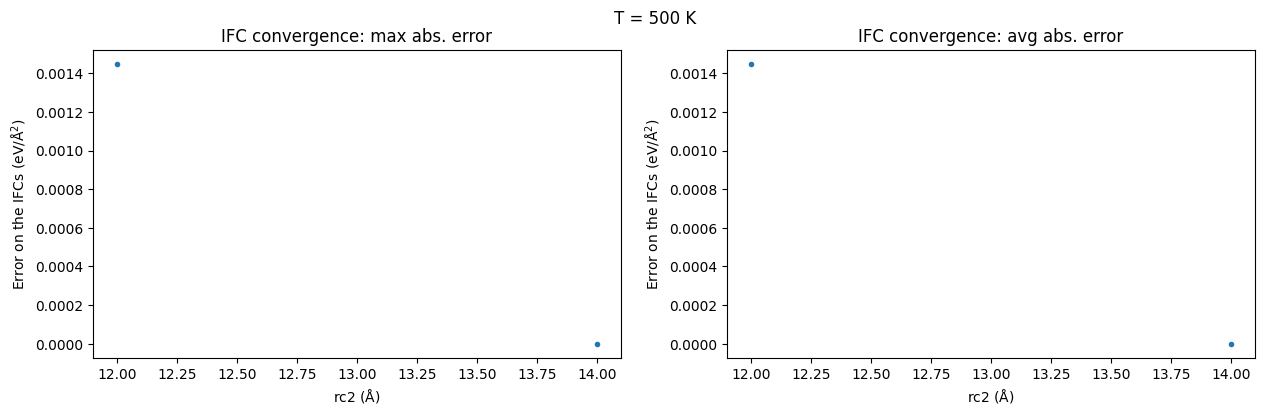

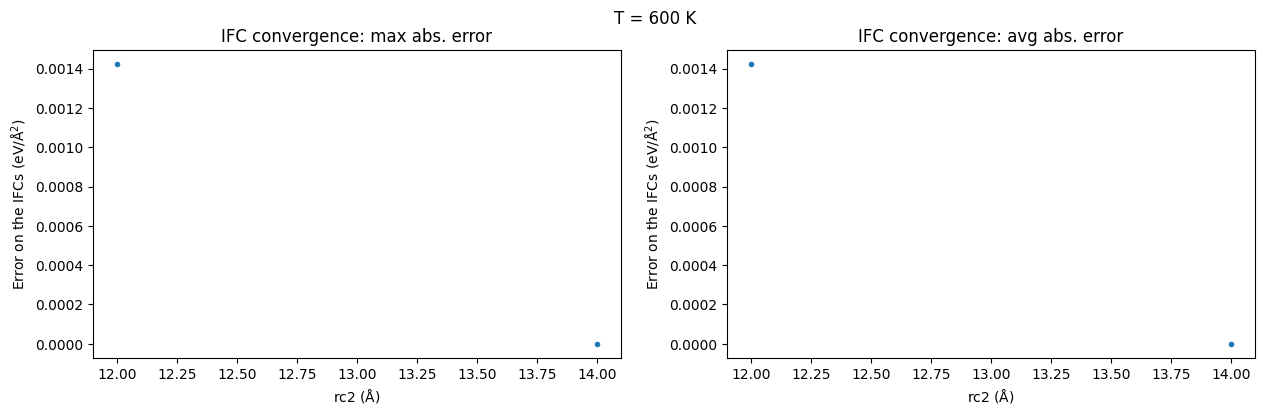

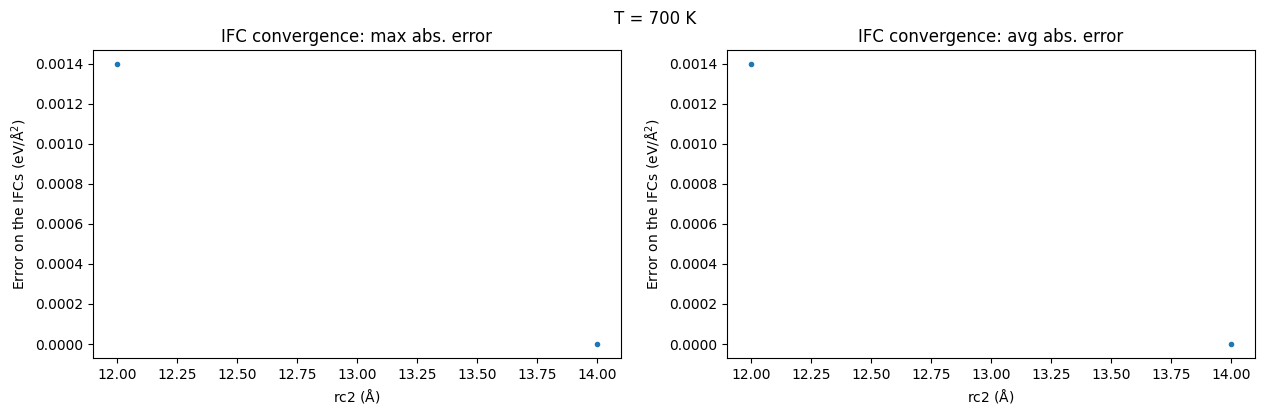

In [5]:
# rc2


convfig_dir = Path('./Tdep_convergence_figures/rc2')
convfig_dir.mkdir(parents=True, exist_ok=True)

n_rc2_to_average = 4

for T in range(100,800,100):
    conv_dir = Path(f'T{T}K/Convergence_tdep/rc2')
    dirs = [x for x in conv_dir.glob('rc2_*')]
    dirs = sorted(dirs, key=lambda x:int(str(x).split('/')[-1].split('_')[-1]))
    
    ifcs = []
    xx = []
    for dir in dirs:
        ifc_file = dir.joinpath('outfile.forceconstant')
        xx.append(int(dir.name.split('_')[-1]))
        unitcell = read(dir.joinpath('infile.ucposcar'), format='vasp')
        supercell = read(dir.joinpath('infile.ssposcar'), format='vasp')
        ifc = parse_outfile_forceconstants(ifc_file, unitcell, supercell)
        ifcs.append(ifc)
    ifcs = np.array(ifcs) # shape: n_rc2, n_atoms_ucell, n_atoms_scell, 3, 3
    diffss = [np.abs(ifcs[i][np.newaxis,:] - ifcs[i -n_rc2_to_average:i]) for i in range(n_rc2_to_average, ifcs.shape[0])] # shape: n_rc2_to_average, n_atoms_ucell, n_atoms_scell, 3, 3
    diffss = np.array(diffss)
    avg_diffss = np.mean(diffss, axis=(2,3,4,5)) # shape: [(n_rc2-n_rc2_to_average), n_rc2_to_average]
    
    avg_avg_diff = np.mean(avg_diffss, axis=1) # shape: nrc2-n_rc2_to_average

    max_diffss = np.max(diffss, axis=(2,3,4,5)) # shape: [(n_rc2-n_rc2_to_average), n_rc2_to_average]
    avg_max_diff = np.mean(avg_diffss, axis=1) # shape: nrc2-n_rc2_to_average

    
    Fig = plt.figure(figsize=(15,4))
    plt.suptitle(f'T = {T} K')
    Fig.add_subplot(1,2,1)
    plt.plot(xx[n_rc2_to_average:], avg_max_diff, '.')
    plt.title('IFC convergence: max abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('rc2 ($\mathrm{\AA}$)')
    
    Fig.add_subplot(1,2,2)
    plt.plot(xx[n_rc2_to_average:], avg_avg_diff, '.')
    plt.title('IFC convergence: avg abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('rc2 ($\mathrm{\AA}$)')
    figpath = convfig_dir.joinpath(f'T{T}K.png')
    plt.savefig(fname=figpath, bbox_inches='tight', dpi=600, format='png')



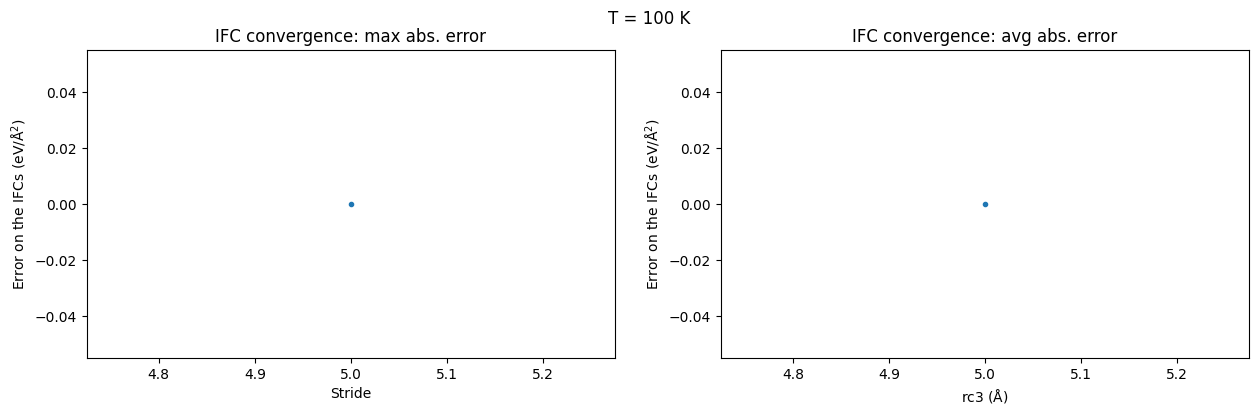

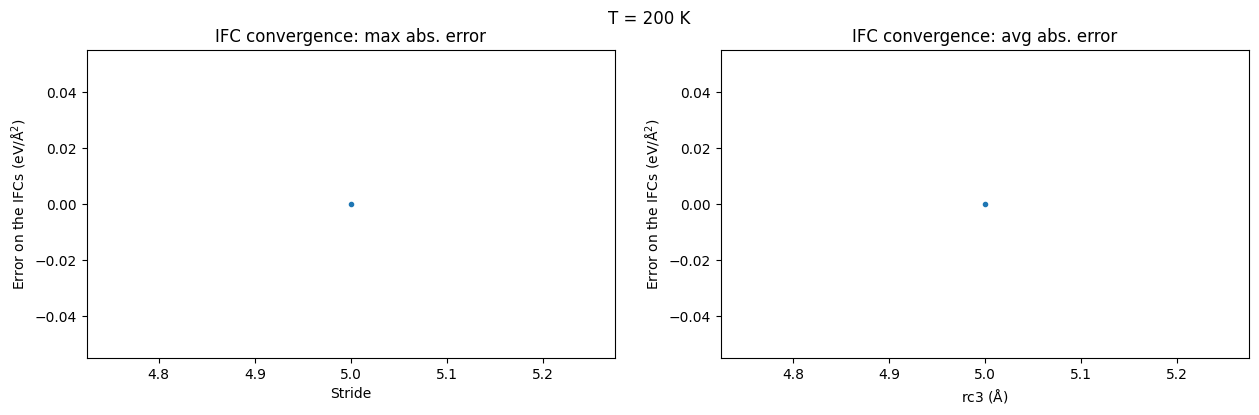

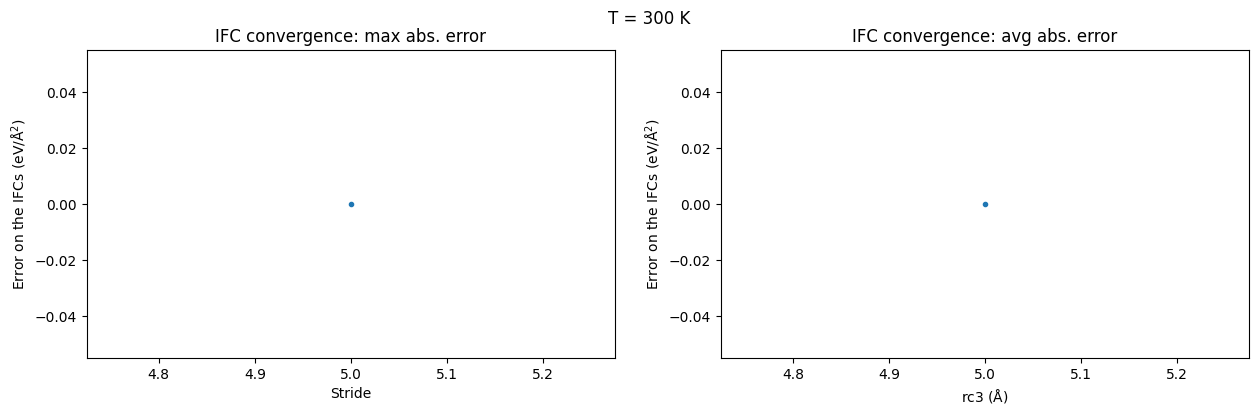

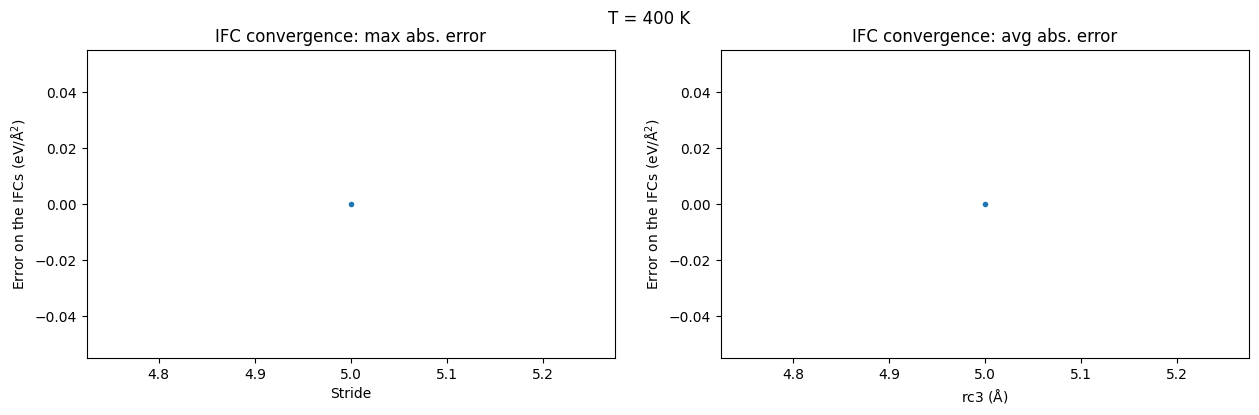

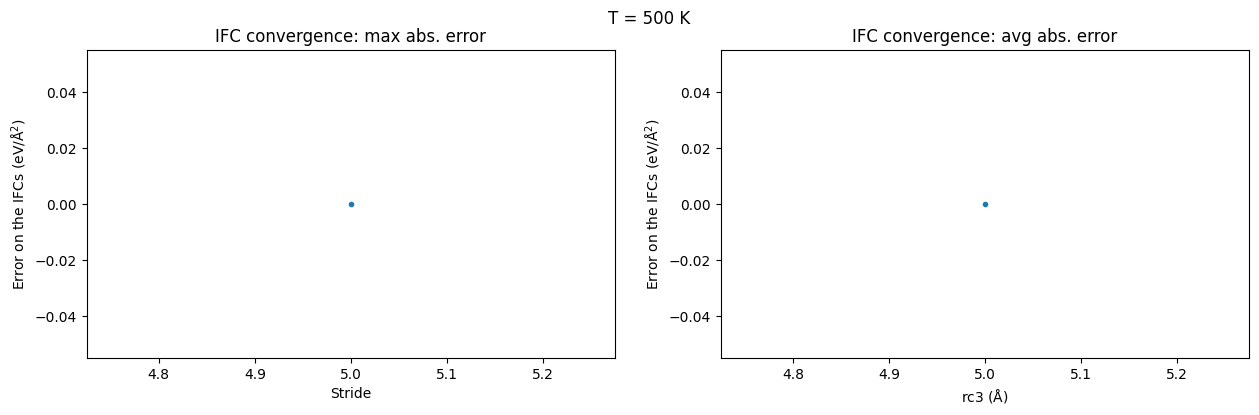

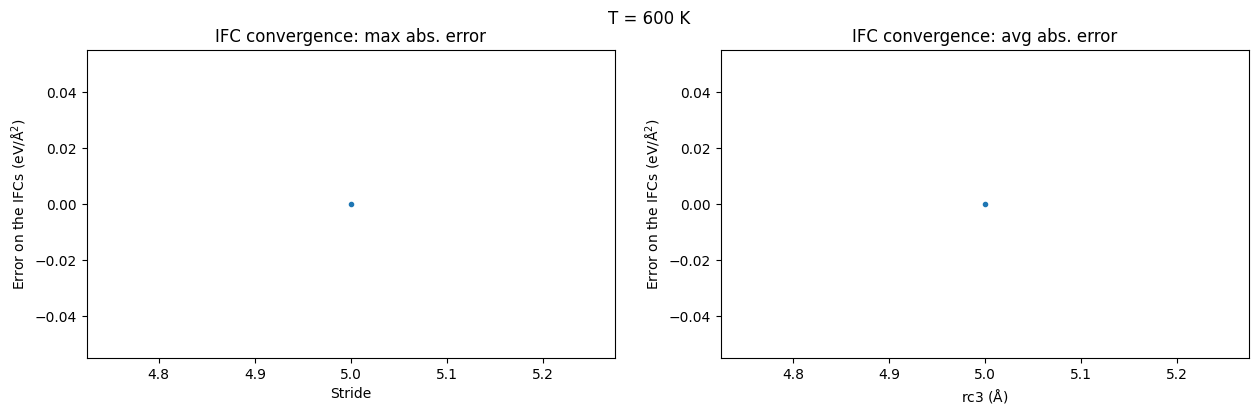

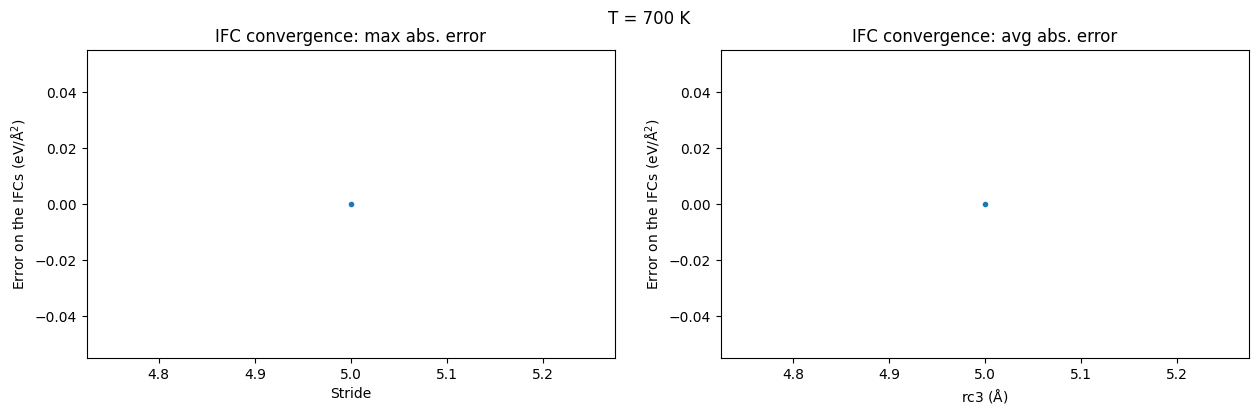

In [4]:
# rc3


convfig_dir = Path('./Tdep_convergence_figures/rc3')
convfig_dir.mkdir(parents=True, exist_ok=True)

n_rc3_to_average = 4

for T in range(100,800,100):
    conv_dir = Path(f'T{T}K/Convergence_tdep/rc3')
    dirs = [x for x in conv_dir.glob('rc3_*')]
    dirs = sorted(dirs, key=lambda x:int(str(x).split('/')[-1].split('_')[-1]))
    
    ifcs = []
    xx = []
    for dir in dirs:
        ifc_file = dir.joinpath('outfile.forceconstant')
        xx.append(int(dir.name.split('_')[-1]))
        unitcell = read(dir.joinpath('infile.ucposcar'), format='vasp')
        supercell = read(dir.joinpath('infile.ssposcar'), format='vasp')
        ifc = parse_outfile_forceconstants(ifc_file, unitcell, supercell)
        ifcs.append(ifc)
    ifcs = np.array(ifcs) # shape: n_rc3, n_atoms_ucell, n_atoms_scell, 3, 3
    diffss = [np.abs(ifcs[i][np.newaxis,:] - ifcs[i -n_rc3_to_average:i]) for i in range(n_rc3_to_average, ifcs.shape[0])] # shape: n_rc3_to_average, n_atoms_ucell, n_atoms_scell, 3, 3
    diffss = np.array(diffss)
    avg_diffss = np.mean(diffss, axis=(2,3,4,5)) # shape: [(n_rc3-n_rc3_to_average), n_rc3_to_average]
    
    avg_avg_diff = np.mean(avg_diffss, axis=1) # shape: nrc3-n_rc3_to_average

    max_diffss = np.max(diffss, axis=(2,3,4,5)) # shape: [(n_rc3-n_rc3_to_average), n_rc3_to_average]
    avg_max_diff = np.mean(avg_diffss, axis=1) # shape: nrc3-n_rc3_to_average

    
    Fig = plt.figure(figsize=(15,4))
    plt.suptitle(f'T = {T} K')
    Fig.add_subplot(1,2,1)
    plt.plot(xx[n_rc3_to_average:], avg_max_diff, '.')
    plt.title('IFC convergence: max abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('rc3 ($\mathrm{\AA}$)')
    
    Fig.add_subplot(1,2,2)
    plt.plot(xx[n_rc3_to_average:], avg_avg_diff, '.')
    plt.title('IFC convergence: avg abs. error')
    plt.ylabel('Error on the IFCs (eV/$\mathrm{\AA}^2$)')
    plt.xlabel('rc3 ($\mathrm{\AA}$)')
    figpath = convfig_dir.joinpath(f'T{T}K.png')
    plt.savefig(fname=figpath, bbox_inches='tight', dpi=600, format='png')



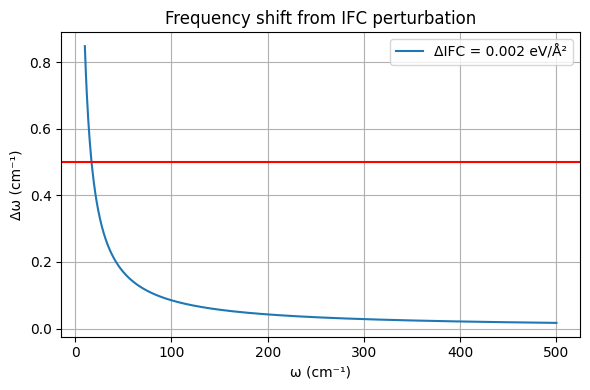

0.002


In [77]:
import numpy as np
import matplotlib.pyplot as plt



def delta_ifc(mass, delta_wvn, wvn):
    c = 299792458 # m/s
    eV_to_J = 1.60218e-19
    J_to_eV = 1/eV_to_J
    Ang_to_m = 1E-10
    m_to_Ang = 1/Ang_to_m
    eVA_to_kgHz2 = eV_to_J/Ang_to_m**2 # kg/s^2

    delta_wvn = delta_wvn * 1E2 # im
    wvn = wvn * 1E2 # im

    delta_ifc = 8 * c**2 * np.pi**2 * mass * delta_wvn * wvn # J/m^2
    delta_ifc = delta_ifc * J_to_eV / m_to_Ang**2
    return delta_ifc

def delta_wvn(mass, delta_ifc, wvn):
    c = 299792458 # m/s
    eV_to_J = 1.60218e-19
    J_to_eV = 1/eV_to_J
    Ang_to_m = 1E-10
    m_to_Ang = 1/Ang_to_m
    eVA_to_kgHz2 = eV_to_J/Ang_to_m**2 # kg/s^2

    delta_ifc = delta_ifc / J_to_eV * m_to_Ang**2 # J/m^2
    wvn = wvn * 1E2 # im
    delta_wvn = delta_ifc / (8 *c**2 * np.pi**2 * mass * wvn) # im
    delta_wvn = delta_wvn * 1E-2 # icm

    return delta_wvn

    
    
    
    
mass = 5.3245181 * 1E-26 # kg


d_ifc = delta_ifc(mass, 0.1, 330)
d_wvn = delta_wvn(mass, d_ifc, 330)


d_ifc = 0.002
wvn = np.linspace(10,500,1000)
d_wvn = delta_wvn(mass, d_ifc, wvn)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(wvn, d_wvn, label=f'ΔIFC = {d_ifc:.3f} eV/Å²')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('ω (cm⁻¹)')
plt.ylabel('Δω (cm⁻¹)')
plt.title('Frequency shift from IFC perturbation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(d_ifc)